In [175]:
# The Iris flower data set or Fisher's Iris data set is a multivariate data set introduced by the British statistician and biologist Ronald Fisher in his 1936 paper.

In [176]:
# The goal of this analysis is to predict flower species (setosa, versicolor or virginica) using k-means clustering

In [177]:
% matplotlib inline
import matplotlib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [178]:
from sklearn import datasets
from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
import sklearn.metrics as sm
from sklearn.metrics import silhouette_score
from sklearn.metrics import adjusted_rand_score
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [179]:
iris = sns.load_dataset("iris")
iris.head(5)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [180]:
iris.species.value_counts()

setosa        50
versicolor    50
virginica     50
Name: species, dtype: int64

In [181]:
# lable encoding: convert the non-numerical values of the "species" columns to numerical 
le = LabelEncoder()
le.fit(iris.species)
list(le.classes_)

['setosa', 'versicolor', 'virginica']

In [182]:
iris.species = le.transform(iris.species)

In [183]:
print(iris.species[0:5])
print(iris.species[50:55])
print(iris.species[100:105])

0    0
1    0
2    0
3    0
4    0
Name: species, dtype: int64
50    1
51    1
52    1
53    1
54    1
Name: species, dtype: int64
100    2
101    2
102    2
103    2
104    2
Name: species, dtype: int64


In [184]:
iris.head(5)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [185]:
# Convert Pandas dataframe to multi-dimensional Numpy arrays i.e. matrix
iris_matrix = pd.DataFrame.as_matrix(iris[['sepal_length','sepal_width','petal_length','petal_width']])

In [186]:
iris_matrix[:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [187]:
clustering_model = KMeans(n_clusters = 3, random_state = 10) # three species measured, therefore, three clusters
# random_state is the seed of the random number generator
# KMeans function is stochastic (the results may vary even if you run the function with the same inputs' values). 
# Hence, specifying the random number seed will make the results reproducible!
clustering_model

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=10, tol=0.0001, verbose=0)

In [188]:
clustering_model.fit(iris_matrix) # Use the original dataset as our training set

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=10, tol=0.0001, verbose=0)

In [189]:
clustering_model.labels_ # "labels_" is one of the attributes of the kmeans objects

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2,
       2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1], dtype=int32)

In [190]:
# Test on the training set data
clustering_labels = clustering_model.fit_predict(iris_matrix)

# Compare the clustering outcome with the original labeling
new_iris = iris
new_iris["pred"] = clustering_labels
new_iris.head(10)

,sepal_length,sepal_width,petal_length,petal_width,species,pred
0,5.1,3.5,1.4,0.2,0,0
1,4.9,3.0,1.4,0.2,0,0
2,4.7,3.2,1.3,0.2,0,0
3,4.6,3.1,1.5,0.2,0,0
4,5.0,3.6,1.4,0.2,0,0
5,5.4,3.9,1.7,0.4,0,0
6,4.6,3.4,1.4,0.3,0,0
7,5.0,3.4,1.5,0.2,0,0
8,4.4,2.9,1.4,0.2,0,0
9,4.9,3.1,1.5,0.1,0,0


In [191]:
# Show the descrepancies between the predictions and the experimental data
new_iris[new_iris.species != new_iris.pred]

,sepal_length,sepal_width,petal_length,petal_width,species,pred
52,6.9,3.1,4.9,1.5,1,2
77,6.7,3.0,5.0,1.7,1,2
101,5.8,2.7,5.1,1.9,2,1
106,4.9,2.5,4.5,1.7,2,1
113,5.7,2.5,5.0,2.0,2,1
114,5.8,2.8,5.1,2.4,2,1
119,6.0,2.2,5.0,1.5,2,1
121,5.6,2.8,4.9,2.0,2,1
123,6.3,2.7,4.9,1.8,2,1
126,6.2,2.8,4.8,1.8,2,1


In [192]:
# Get the accuracy score to assess the performance of clustering
print sm.accuracy_score(iris.species, clustering_labels)

print metrics.adjusted_rand_score(iris.species, clustering_labels)


0.8933333333333333
0.7302382722834697


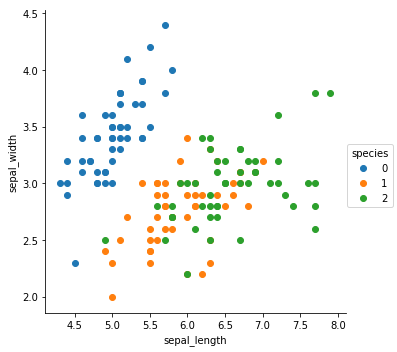

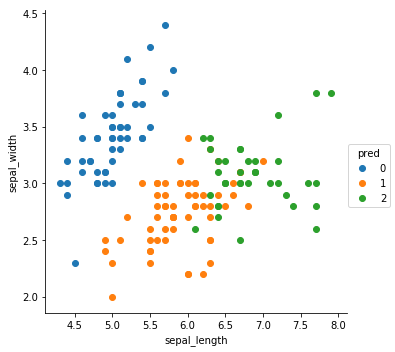

In [193]:
sns.FacetGrid(new_iris, hue = "species", size = 5).map(plt.scatter, "sepal_length", "sepal_width").add_legend()
sns.FacetGrid(new_iris, hue = "pred", size = 5).map(plt.scatter, "sepal_length", "sepal_width").add_legend()

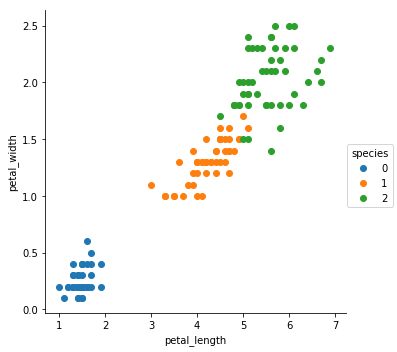

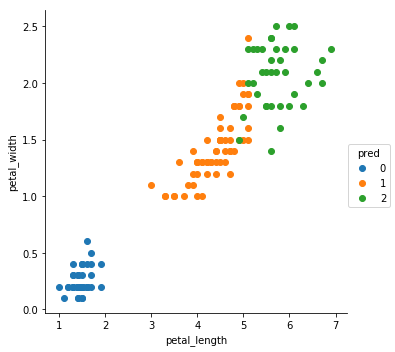

In [194]:
sns.FacetGrid(new_iris, hue = "species", size = 5).map(plt.scatter, "petal_length", "petal_width").add_legend()
sns.FacetGrid(new_iris, hue = "pred", size = 5).map(plt.scatter, "petal_length", "petal_width").add_legend()

In [195]:
# Alternatively, load the iris dataset from sklearn with the same data but better organized
from sklearn import datasets
iris = datasets.load_iris()

In [196]:
list(iris)

['target_names', 'data', 'target', 'DESCR', 'feature_names']

In [197]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [198]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [199]:
iris.data[:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [200]:
# Use logistic regression
